In [1]:
import numpy as np
import pandas as pd

In [2]:
import chardet
with open('final_data.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.columns

Index(['Tweet', 'Keywords', 'Lable', 'Categorize'], dtype='object')

In [5]:
df.shape

(5259, 4)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deployment

## 1. Data Cleaning


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5259 entries, 0 to 5258
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet       5259 non-null   object
 1   Keywords    2281 non-null   object
 2   Lable       5251 non-null   object
 3   Categorize  2215 non-null   object
dtypes: object(4)
memory usage: 164.5+ KB


In [9]:
df.drop(columns=['Categorize', 'Keywords'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5259 entries, 0 to 5258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   5259 non-null   object
 1   Lable   5251 non-null   object
dtypes: object(2)
memory usage: 82.3+ KB


In [11]:
df.dropna(subset=['Lable'], inplace=True)

In [12]:
df.rename(columns={'Lable': 'target', 'Tweet': 'text'}, inplace=True)

In [13]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
df.head()

,text,target
0,: The unspoken reason for lockdowns No policy...,1
1,"PM’s India visit: Some agreements, soft-pedall...",0
2,India and China broke into fresh diplomatic sp...,0
3,Prolonged drought: Western Region faces crop l...,1
4,Nepal-China foreign secretary-level talks to b...,0


In [15]:
data_new2 = df.copy()                          # Create duplicate of data
data_new2.dropna(inplace=True)                      # Remove rows with NaN
print(data_new2)

                                                   text target
0      : The unspoken reason for lockdowns No policy...      1
1     PM’s India visit: Some agreements, soft-pedall...      0
2     India and China broke into fresh diplomatic sp...      0
3     Prolonged drought: Western Region faces crop l...      1
4     Nepal-China foreign secretary-level talks to b...      0
...                                                 ...    ...
5246  CORRECTION: Arrest warrant issued against form...      0
5247  Another cable car project in the northwest of ...      0
5248  Refugee scam-accused may face charges besides ...      0
5249  South Korean Embassy in Kathmandu sent out an ...      0
5250  Many casualties in New Jersey train crash (In ...      1

[5251 rows x 2 columns]


In [16]:
df = data_new2

In [17]:
df.shape

(5251, 2)

In [18]:
df.columns

Index(['text', 'target'], dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5251 non-null   object
 1   target  5251 non-null   object
dtypes: object(2)
memory usage: 82.2+ KB


In [20]:
df = df[pd.to_numeric(df['target'], errors='coerce').notnull()]
df['target'] = df['target'].astype(int)

/tmp/ipykernel_5539/1279686699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].astype(int)


In [21]:
df.shape

(5250, 2)

In [22]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [23]:
df.duplicated().sum()

797

In [24]:
df = df.drop_duplicates(keep='first')

In [25]:
df.shape

(4453, 2)

## 2. EDA


In [26]:
df.head()

,text,target
0,: The unspoken reason for lockdowns No policy...,1
1,"PM’s India visit: Some agreements, soft-pedall...",0
2,India and China broke into fresh diplomatic sp...,0
3,Prolonged drought: Western Region faces crop l...,1
4,Nepal-China foreign secretary-level talks to b...,0


In [27]:
df['target'].value_counts()

target
0    2330
1    2123
Name: count, dtype: int64

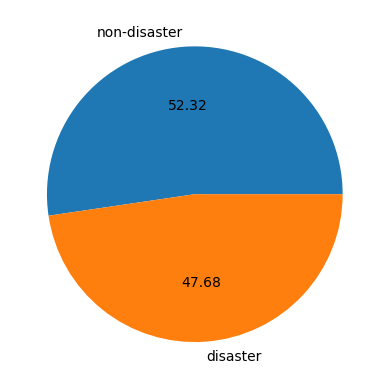

In [28]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=[
        'non-disaster', 'disaster'], autopct="%0.2f")
plt.show()

In [29]:
# Data is imbalanced

In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/uan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df['num_characters'] = df['text'].apply(len)

In [33]:
df.head()

,text,target,num_characters
0,: The unspoken reason for lockdowns No policy...,1,174
1,"PM’s India visit: Some agreements, soft-pedall...",0,222
2,India and China broke into fresh diplomatic sp...,0,165
3,Prolonged drought: Western Region faces crop l...,1,69
4,Nepal-China foreign secretary-level talks to b...,0,153


In [34]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [35]:
df.head()

,text,target,num_characters,num_words
0,: The unspoken reason for lockdowns No policy...,1,174,30
1,"PM’s India visit: Some agreements, soft-pedall...",0,222,40
2,India and China broke into fresh diplomatic sp...,0,165,28
3,Prolonged drought: Western Region faces crop l...,1,69,11
4,Nepal-China foreign secretary-level talks to b...,0,153,28


In [36]:
 df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,: The unspoken reason for lockdowns No policy...,1,174,30,1
1,"PM’s India visit: Some agreements, soft-pedall...",0,222,40,1
2,India and China broke into fresh diplomatic sp...,0,165,28,1
3,Prolonged drought: Western Region faces crop l...,1,69,11,1
4,Nepal-China foreign secretary-level talks to b...,0,153,28,1


In [38]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4453.000000,4453.000000,4453.000000
mean,156.329890,27.141478,1.198967
std,51.865033,9.320596,0.437904
min,21.000000,3.000000,1.000000
25%,123.000000,21.000000,1.000000
50%,162.000000,28.000000,1.000000
75%,194.000000,33.000000,1.000000
max,283.000000,60.000000,4.000000


In [39]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2330.000000,2330.000000,2330.000000
mean,165.841631,29.060515,1.287124
std,42.029956,7.696599,0.511320
min,22.000000,4.000000,1.000000
25%,136.000000,24.000000,1.000000
50%,164.000000,29.000000,1.000000
75%,195.000000,34.000000,2.000000
max,283.000000,60.000000,4.000000


In [40]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2123.000000,2123.000000,2123.000000
mean,145.890721,25.035327,1.102214
std,59.130603,10.429024,0.312193
min,21.000000,3.000000,1.000000
25%,94.000000,16.000000,1.000000
50%,157.000000,26.000000,1.000000
75%,192.000000,32.000000,1.000000
max,261.000000,57.000000,3.000000


In [41]:
import seaborn as sns

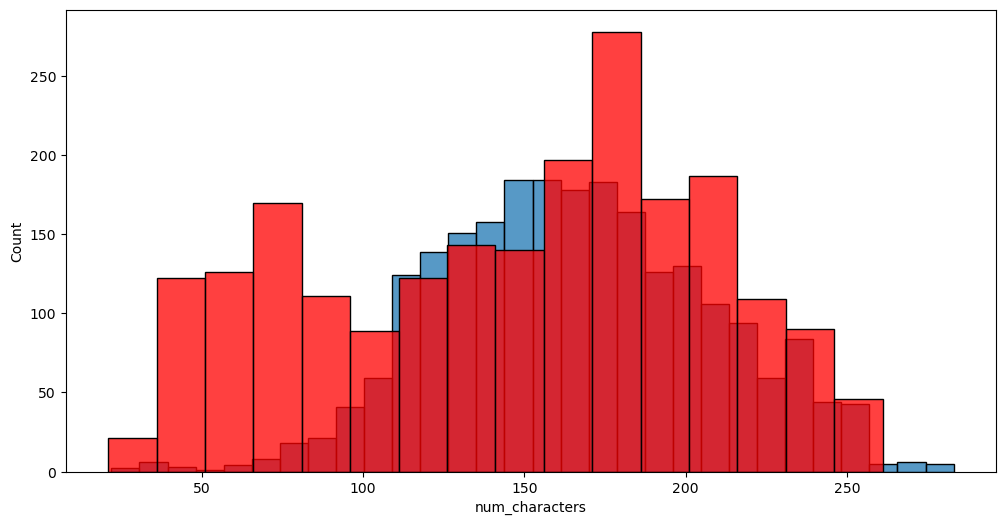

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

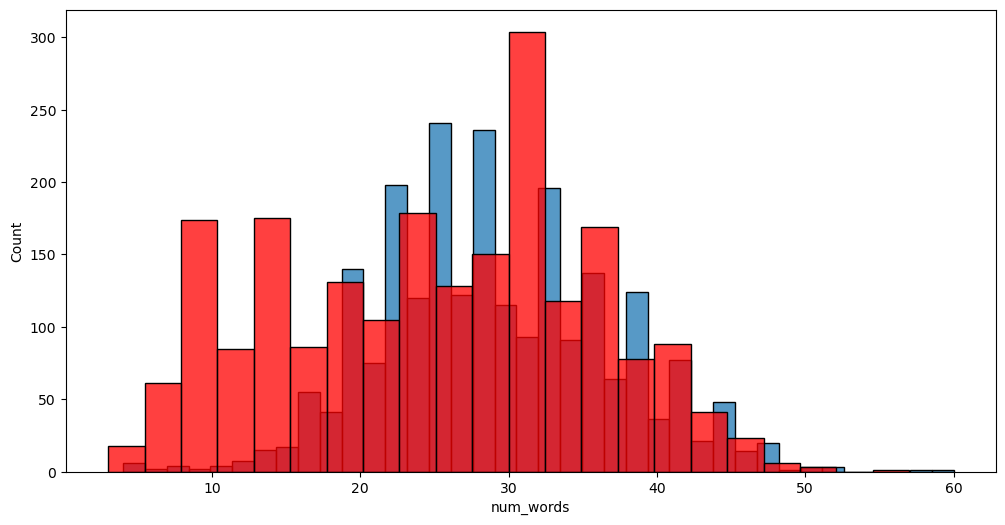

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

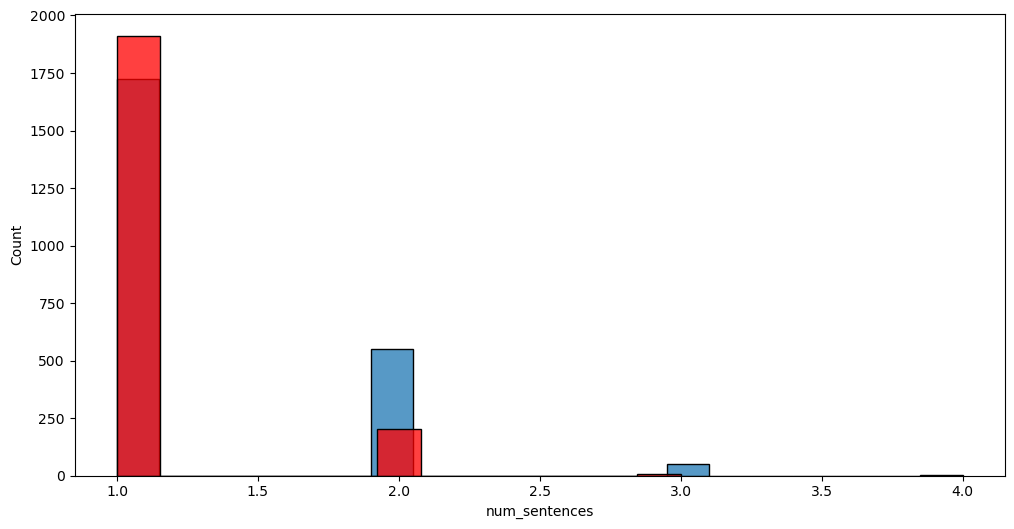

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

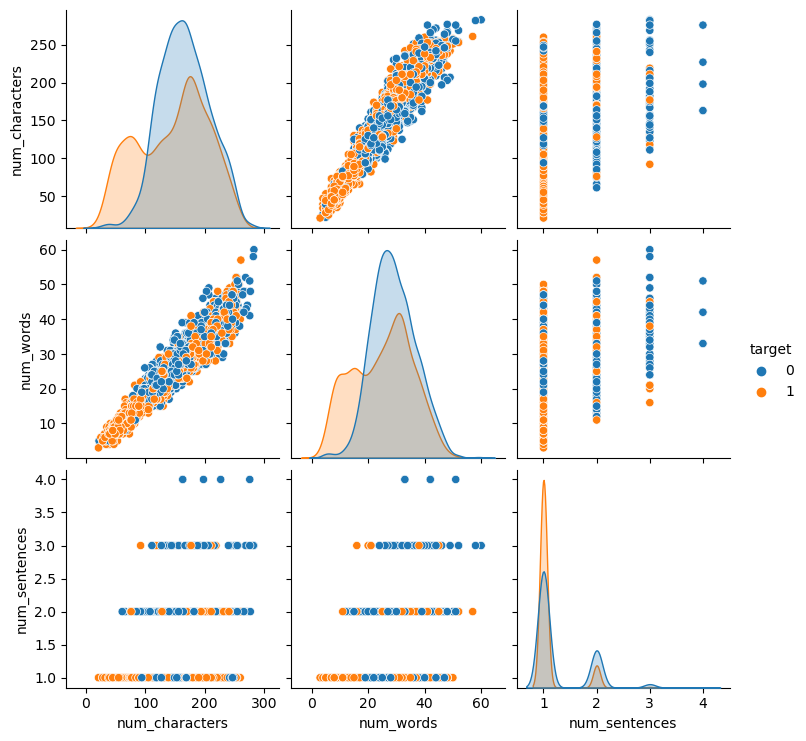

In [45]:
df['target'] = df['target'].astype('category')
sns.pairplot(df, hue='target')

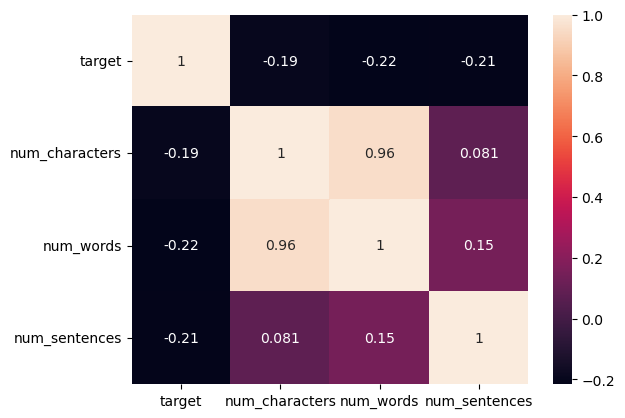

In [46]:
df['target'] = df['target'].astype(int)
sns.heatmap(df[['target', 'num_characters', 'num_words',
            'num_sentences']].corr(), annot=True)

## 3. Data Preprocessing

- Lowercase
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('matching')

'match'

In [48]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [49]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
string.punctuation

[nltk_data] Downloading package stopwords to /home/uan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
transform_text("Business owners of Palpa reminisce about traditional weight measuring tools, including dhak and taraju. 👉 Details: #TheKathmanduPost")

'busi owner palpa reminisc tradit weight measur tool includ dhak taraju detail thekathmandupost'

In [51]:
df['text'][60]

'Business owners of Palpa reminisce about traditional weight measuring tools, including dhak and taraju. 👉 Details: #TheKathmanduPost'

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,: The unspoken reason for lockdowns No policy...,1,174,30,1,unspoken reason lockdown policymak prepar allo...
1,"PM’s India visit: Some agreements, soft-pedall...",0,222,40,1,pm india visit agreement contenti issu kathman...
2,India and China broke into fresh diplomatic sp...,0,165,28,1,india china broke fresh diplomat spar thursday...
3,Prolonged drought: Western Region faces crop l...,1,69,11,1,prolong drought western region face crop loss ...
4,Nepal-China foreign secretary-level talks to b...,0,153,28,1,foreign talk held beij next week meet come ahe...


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,
               background_color='white')

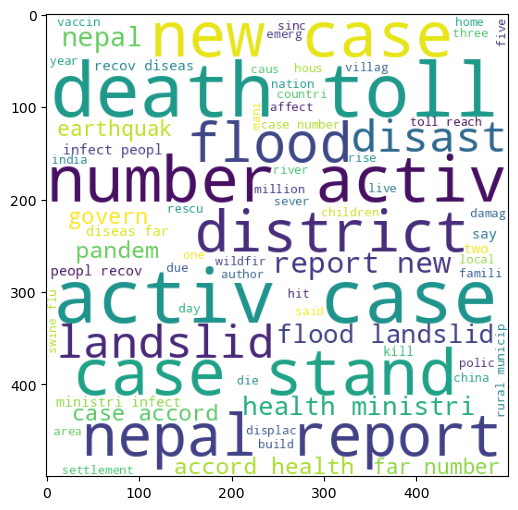

In [55]:
disaster_wc = wc.generate(
    df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(disaster_wc)

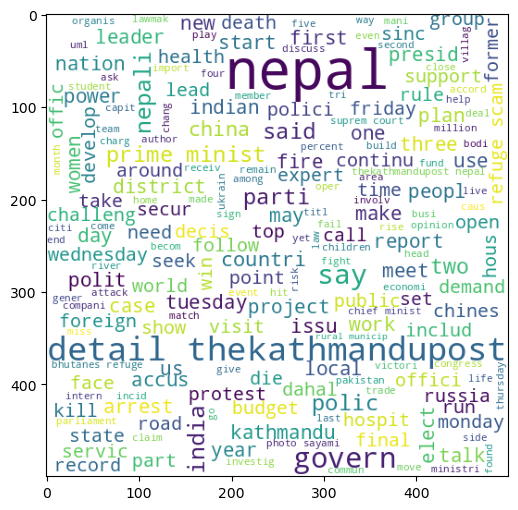

In [56]:
nondisaster_wc = wc.generate(
    df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(nondisaster_wc)

In [57]:
   df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,: The unspoken reason for lockdowns No policy...,1,174,30,1,unspoken reason lockdown policymak prepar allo...
1,"PM’s India visit: Some agreements, soft-pedall...",0,222,40,1,pm india visit agreement contenti issu kathman...
2,India and China broke into fresh diplomatic sp...,0,165,28,1,india china broke fresh diplomat spar thursday...
3,Prolonged drought: Western Region faces crop l...,1,69,11,1,prolong drought western region face crop loss ...
4,Nepal-China foreign secretary-level talks to b...,0,153,28,1,foreign talk held beij next week meet come ahe...


In [58]:
disaster_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        disaster_corpus.append(word)

In [59]:
len(disaster_corpus)

31291

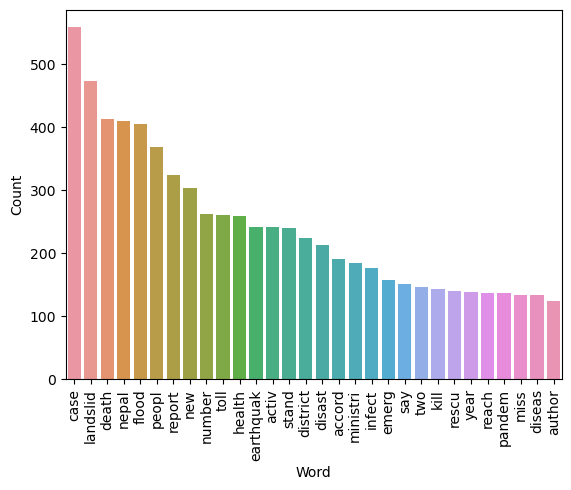

In [60]:
from collections import Counter
# Count the occurrences of each item in the spam_corpus
disaster_counts = Counter(disaster_corpus).most_common(30)

# Create a DataFrame from the spam_counts
df_counts = pd.DataFrame(disaster_counts, columns=['Word', 'Count'])

# Plot the barplot using the DataFrame columns as keyword arguments
sns.barplot(x='Word', y='Count', data=df_counts)
plt.xticks(rotation='vertical')
plt.show()
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [61]:
non_disaster_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        non_disaster_corpus.append(word)

In [62]:
len(non_disaster_corpus)

38613

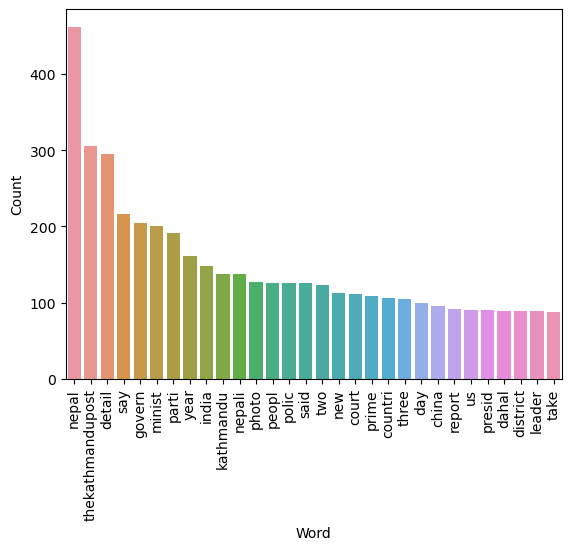

In [63]:
from collections import Counter
# Count the occurrences of each item in the spam_corpus
non_disaster_counts = Counter(non_disaster_corpus).most_common(30)

# Create a DataFrame from the spam_counts
df_counts = pd.DataFrame(non_disaster_counts, columns=['Word', 'Count'])

# Plot the barplot using the DataFrame columns as keyword arguments
sns.barplot(x='Word', y='Count', data=df_counts)
plt.xticks(rotation='vertical')
plt.show()
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

## 4. Model Building


In [64]:
# Text Vectorization
# Using bag of words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [66]:
X.shape

(4453, 7651)

In [67]:
y = df['target'].values

In [68]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.842814371257485
[[568 113]
 [ 97 558]]
0.8315946348733234


In [74]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
# print(recall_score(y_test,y_pred1))
# print(f1_score(y_test,y_pred1))

0.8944610778443114
[[578 103]
 [ 38 617]]
0.8569444444444444


In [75]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8959580838323353
[[577 104]
 [ 35 620]]
0.856353591160221


In [76]:
# tfidf  --> mnb

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [80]:
clfs = {
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
}

In [81]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [85]:
train_classifier(mnb, X_train, y_train, X_test, y_test)

(0.8944610778443114, 0.8569444444444444)

In [86]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.6332335329341318
Precision -  0.5726872246696035
For  NB
Accuracy -  0.8944610778443114
Precision -  0.8569444444444444
For  DT
Accuracy -  0.7934131736526946
Precision -  0.9437939110070258
For  LR
Accuracy -  0.9348802395209581
Precision -  0.9316109422492401
For  RF
Accuracy -  0.9236526946107785
Precision -  0.896700143472023


In [87]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,
                              'Precision': precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,DT,0.793413,0.943794
3,LR,0.934880,0.931611
4,RF,0.923653,0.896700
1,NB,0.894461,0.856944
0,KN,0.633234,0.572687


In [88]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,
                              'Precision': precision_scores}).sort_values('Accuracy', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
3,LR,0.934880,0.931611
4,RF,0.923653,0.896700
1,NB,0.894461,0.856944
2,DT,0.793413,0.943794
0,KN,0.633234,0.572687


In [89]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")
performance_df

,Algorithm,Accuracy,Precision
3,LR,0.934880,0.931611
4,RF,0.923653,0.896700
1,NB,0.894461,0.856944
2,DT,0.793413,0.943794
0,KN,0.633234,0.572687


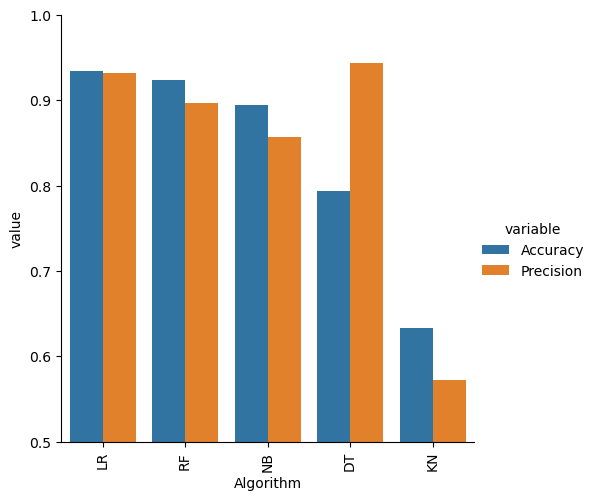

In [90]:
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [91]:
# model improve

In [92]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

In [93]:
voting = VotingClassifier(
    estimators=[('lr', lrc), ('nb', mnb), ('rf', rfc)], voting='soft')

In [94]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9266467065868264
Precision 0.8995695839311334


In [96]:
# Applying stacking
estimators = [('lr', lrc), ('nb', mnb), ('rf', rfc)]
final_estimator = RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators,
                         final_estimator=final_estimator)

In [98]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9356287425149701
Precision 0.9214814814814815


In [99]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(lrc, open('model.pkl', 'wb'))